In [1]:
!ls datasets/kontali

broken/      currency.csv  Python_kurs_datasett.rar
country.csv  product.csv   ssb_export.csv


In [3]:
import pandas as pd
from pathlib import Path

dirpath = Path("datasets/kontali")

# Currency

### Read the file `currency.csv` into a pandas DataFrame

Hints:
1. the function to use here is `pd.read_csv`
1. we can specify the path to `currency,csv` with `os.path.join` or `pathlib.Path` from the builtin modules
1. we must use the keyword argument `encoding="latin-1"`
1. we should also specify two other keywords

In [4]:
df_currency = pd.read_csv(dirpath / "currency.csv", encoding="latin-1", delimiter=";", decimal=",")

### What is the most recent date for which we have foreign exchange rates?

In [5]:
df_currency.tail()

,Dato,1 USD,1 EUR,100 DKK,1 GBP,100 SEK
1242,2022-12-14,9.7305,10.3620,139.29,12.0323,95.38
1243,2022-12-15,9.7931,10.4013,139.83,12.0673,95.44
1244,2022-12-16,9.8722,10.4833,140.94,12.0176,95.17
1245,2022-12-19,9.9099,10.5025,141.20,12.0555,95.42
1246,2022-12-20,9.9158,10.5098,141.28,12.0071,95.01


### Change `Dato` dtype to Datetime, and move `Dato` to the index.

In [6]:
df_currency["Dato"] = pd.to_datetime(df_currency["Dato"])
df_currency.set_index("Dato", inplace=True)
df_currency.head()

,1 USD,1 EUR,100 DKK,1 GBP,100 SEK
Dato,,,,,
2018-01-02,8.1018,9.7748,131.32,10.9887,99.46
2018-01-03,8.1045,9.7440,130.89,10.9928,99.18
2018-01-04,8.0941,9.7655,131.17,10.9598,99.42
2018-01-05,8.0878,9.7418,130.83,10.9603,99.08
2018-01-08,8.0834,9.6783,129.97,10.9467,98.59


### Reshape Currency dataframe

Make a new dataframe with the following criteria:
1. a column called `Ccy` (short for Currency)
2. a column called `FX` (short for Foreign eXchange)

In [7]:
df_currency.dtypes

1 USD      float64
1 EUR      float64
100 DKK    float64
1 GBP      float64
100 SEK    float64
dtype: object

In [8]:
df_currency.head()

,1 USD,1 EUR,100 DKK,1 GBP,100 SEK
Dato,,,,,
2018-01-02,8.1018,9.7748,131.32,10.9887,99.46
2018-01-03,8.1045,9.7440,130.89,10.9928,99.18
2018-01-04,8.0941,9.7655,131.17,10.9598,99.42
2018-01-05,8.0878,9.7418,130.83,10.9603,99.08
2018-01-08,8.0834,9.6783,129.97,10.9467,98.59


### Extract the unit (1 or 100) and the currency name from the column labels

Hint: You can use the `.str` accessor on `df_currency.columns`. Here is a useful [link](https://pandas.pydata.org/docs/user_guide/text.html#extracting-substrings) on extracting substrings from a string.

This following regular expression pattern can be used to get the unit and currency:

`pattern = r"(\d+) (\w+)"`


#### Explanation of the regular expression pattern (can be skipped)

The `r` prefix before the string indicates that it is a [raw string literal](https://stackoverflow.com/questions/2081640/what-exactly-do-u-and-r-string-prefixes-do-and-what-are-raw-string-literals), which in our case means that the backslash is just treated as a backslash.

`\d+` matches Unicode decimal digits (the plus means "at least one", so we match on "at least one digit".

`\w+` matches Unicode word characters.

The parentheses indicate a "capture group". Each capture group will become a column in the returned dataframe.

So to sum it all up, the regular expression first matches one or more digits, then a whitespace, then one or more word letters.

In [18]:
pattern = r"(\d+) (\w+)"

df_ccy = df_currency.columns.str.extract(pattern)
df_ccy

,0,1
0,1,USD
1,1,EUR
2,100,DKK
3,1,GBP
4,100,SEK


Did it work? Great!

Let's add some names on the two captured groups. This will give us **correctly named columns** for our returned dataframe.

Now the pattern is looking really complex, but we don't really have to concern ourselves with that. Having `?P<unit>` inside the capture group just means: *the captured group should be named `unit`*.

`pattern = r"(?P<unit>\d+) (?P<Ccy>\w+)"`

In [12]:
pattern = r"(?P<unit>\d+) (?P<Ccy>\w+)"
df_ccy = df_currency.columns.str.extract(pattern, expand=True)
df_ccy

,unit,Ccy
0,1,USD
1,1,EUR
2,100,DKK
3,1,GBP
4,100,SEK


In [13]:
df_ccy = df_ccy.astype({"unit": "int64"})
df_ccy

,unit,Ccy
0,1,USD
1,1,EUR
2,100,DKK
3,1,GBP
4,100,SEK


In [14]:
df_cur = df_currency.copy()

df_cur.columns = df_ccy.Ccy
df_cur

Ccy,USD,EUR,DKK,GBP,SEK
Dato,,,,,
2018-01-02,8.1018,9.7748,131.32,10.9887,99.46
2018-01-03,8.1045,9.7440,130.89,10.9928,99.18
2018-01-04,8.0941,9.7655,131.17,10.9598,99.42
2018-01-05,8.0878,9.7418,130.83,10.9603,99.08
2018-01-08,8.0834,9.6783,129.97,10.9467,98.59
...,...,...,...,...,...
2022-12-14,9.7305,10.3620,139.29,12.0323,95.38
2022-12-15,9.7931,10.4013,139.83,12.0673,95.44
2022-12-16,9.8722,10.4833,140.94,12.0176,95.17


In [15]:
df_ccy.set_index('Ccy', inplace=True)

In [16]:
df_ccy

,unit
Ccy,
USD,1
EUR,1
DKK,100
GBP,1
SEK,100


In [17]:
df_cur / df_ccy["unit"]

Ccy,USD,EUR,DKK,GBP,SEK
Dato,,,,,
2018-01-02,8.1018,9.7748,1.3132,10.9887,0.9946
2018-01-03,8.1045,9.7440,1.3089,10.9928,0.9918
2018-01-04,8.0941,9.7655,1.3117,10.9598,0.9942
2018-01-05,8.0878,9.7418,1.3083,10.9603,0.9908
2018-01-08,8.0834,9.6783,1.2997,10.9467,0.9859
...,...,...,...,...,...
2022-12-14,9.7305,10.3620,1.3929,12.0323,0.9538
2022-12-15,9.7931,10.4013,1.3983,12.0673,0.9544
2022-12-16,9.8722,10.4833,1.4094,12.0176,0.9517


In [18]:
df_cur.div(df_ccy['unit'].T, axis=1)

Ccy,USD,EUR,DKK,GBP,SEK
Dato,,,,,
2018-01-02,8.1018,9.7748,1.3132,10.9887,0.9946
2018-01-03,8.1045,9.7440,1.3089,10.9928,0.9918
2018-01-04,8.0941,9.7655,1.3117,10.9598,0.9942
2018-01-05,8.0878,9.7418,1.3083,10.9603,0.9908
2018-01-08,8.0834,9.6783,1.2997,10.9467,0.9859
...,...,...,...,...,...
2022-12-14,9.7305,10.3620,1.3929,12.0323,0.9538
2022-12-15,9.7931,10.4013,1.3983,12.0673,0.9544
2022-12-16,9.8722,10.4833,1.4094,12.0176,0.9517


In [19]:
df_cur /= df_ccy["unit"]

In [20]:
df_cur

Ccy,USD,EUR,DKK,GBP,SEK
Dato,,,,,
2018-01-02,8.1018,9.7748,1.3132,10.9887,0.9946
2018-01-03,8.1045,9.7440,1.3089,10.9928,0.9918
2018-01-04,8.0941,9.7655,1.3117,10.9598,0.9942
2018-01-05,8.0878,9.7418,1.3083,10.9603,0.9908
2018-01-08,8.0834,9.6783,1.2997,10.9467,0.9859
...,...,...,...,...,...
2022-12-14,9.7305,10.3620,1.3929,12.0323,0.9538
2022-12-15,9.7931,10.4013,1.3983,12.0673,0.9544
2022-12-16,9.8722,10.4833,1.4094,12.0176,0.9517


# Country

With this dataframe we can simply set the country_code as index.

Bonus: Is there a way to do this in `pd.read_csv` already?

In [21]:
df_country = pd.read_csv(dirpath / "country.csv",
                         encoding="latin-1",
                         delimiter=";",
                         index_col="country_code"
                        )

df_country.head()

,Country,Land,Market,Market_SBSB,Market_SLX
country_code,,,,,
AD,Andorra,Andorra,Other Europe,All others,Other
AE,United Arab Emirates,De forente Arabiske Emirater,Asia,Asia,Other
AF,Afghanistan,Afghanistan,Asia,Asia,Other
AG,Antigua and Barbuda,Antigua og Barbuda,North-America,North America,Other
AI,Anguilla,Anguilla,North-America,North America,Other


# Product

In [51]:
df_product = pd.read_csv(dirpath / "product.csv",
                         encoding="latin-1", 
                         delimiter=";", 
                         index_col="Product_Code",
                        )
df_product.head(100)

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation
Product_Code,,,,,,,
3031100,1,NO,Frozen sockeye,SOC,NaN,FRO,NaN
3045202,2,NO,"Fresh trout, else",TRR,OTH,FRE,NaN
3054100,3,NO,Smoked salmon,SAL,NaN,PRS,SMO
16041101,4,NO,Brine cured salmon,SAL,OTH,PRS,BRI
16041102,5,NO,Salmon in airtight package,SAL,OTH,PRS,BRI
16041109,6,NO,"Canned salmon, else",SAL,OTH,PRS,BRI
3021190,7,NO,"Fresh trout, not farmed",TRO,NaN,FRE,NaN
3049903,8,NO,"Frozen salmon, minced fishmeat",SAL,OTH,FRO,NaN
3021111,9,NO,Fresh trout (head on),TRR,WHL,FRE,NaN


### How many product categories are there?

In [107]:
len(df_product), df_product.shape

(31, (31, 7))

### Make a selection dataframe that only contains trout products

In [114]:
df_product.loc[df_product["Species_Code"] == "TRR"]

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation
Product_Code,,,,,,,
3045202,2,NO,"Fresh trout, else",TRR,OTH,FRE,NaN
3021111,9,NO,Fresh trout (head on),TRR,WHL,FRE,NaN
3021119,10,NO,Fresh trout (head off),TRR,WHL,FRE,NaN
3054300,15,NO,Smoked Trout,TRR,NaN,PRS,SMO
3031411,18,NO,Frozen trout (head on),TRR,WHL,FRO,NaN
3031419,19,NO,Frozen trout (head off),TRR,WHL,FRO,NaN
3044200,22,NO,Fresh trout fillets,TRR,FIL,FRE,NaN
3048200,25,NO,Frozen trout fillets,TRR,FIL,FRO,NaN
3019100,27,NO,"Live, trout (Salmo trutta, Oncorhynchus mykiss...",TRR,NaN,ALI,NaN


### Sort dataframe by product code

In [117]:
df_product.sort_index()

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation
Product_Code,,,,,,,
3019100,27,NO,"Live, trout (Salmo trutta, Oncorhynchus mykiss...",TRR,NaN,ALI,NaN
3019901,28,NO,"Salmon (alevin, parr, smolt etc.), live",SAL,NaN,ALI,NaN
3019906,29,NO,"Live, Arctic char (Salvelinus alpinus)",ACH,NaN,ALI,NaN
3021111,9,NO,Fresh trout (head on),TRR,WHL,FRE,NaN
3021119,10,NO,Fresh trout (head off),TRR,WHL,FRE,NaN
3021190,7,NO,"Fresh trout, not farmed",TRO,NaN,FRE,NaN
3021300,11,NO,Fresh Pacific Salmon,ORC,WHL,FRE,NaN
3021411,12,NO,Fresh Atlantic salmon (head on),SAL,WHL,FRE,NaN
3021419,13,NO,Fresh Atlantic salmon (head off),SAL,WHL,FRE,NaN


### Sort dataframe by species code (lexicographically)

In [118]:
df_product.sort_values("Species_Code")

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation
Product_Code,,,,,,,
3019906,29,NO,"Live, Arctic char (Salvelinus alpinus)",ACH,NaN,ALI,NaN
3021901,30,NO,"Fresh or chilled, char (Salvelinus spp.), excl...",ACH,WHL,FRE,NaN
3021300,11,NO,Fresh Pacific Salmon,ORC,WHL,FRE,NaN
3031311,16,NO,Frozen Atlantic salmon (head on),SAL,WHL,FRO,NaN
3019901,28,NO,"Salmon (alevin, parr, smolt etc.), live",SAL,NaN,ALI,NaN
3039901,26,NO,Biproduct of Frozen Atlantic salmon,SAL,BYP,FRO,NaN
3048100,24,NO,Frozen salmon fillets,SAL,FIL,FRO,NaN
3045200,23,NO,"Fresh salmonidae, else",SAL,OTH,FRE,NaN
3044100,21,NO,Fresh salmon fillets,SAL,FIL,FRE,NaN


### Sort dataframe by species code, then presentation, then preservation (lexicographically)

In [121]:
df_product.sort_values(["Species_Code", "Presentation", "Preservation"])

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation
Product_Code,,,,,,,
3021901,30,NO,"Fresh or chilled, char (Salvelinus spp.), excl...",ACH,WHL,FRE,NaN
3019906,29,NO,"Live, Arctic char (Salvelinus alpinus)",ACH,NaN,ALI,NaN
3021300,11,NO,Fresh Pacific Salmon,ORC,WHL,FRE,NaN
3039901,26,NO,Biproduct of Frozen Atlantic salmon,SAL,BYP,FRO,NaN
3044100,21,NO,Fresh salmon fillets,SAL,FIL,FRE,NaN
3048100,24,NO,Frozen salmon fillets,SAL,FIL,FRO,NaN
3045200,23,NO,"Fresh salmonidae, else",SAL,OTH,FRE,NaN
3049903,8,NO,"Frozen salmon, minced fishmeat",SAL,OTH,FRO,NaN
3049991,287,NO,"Frozen salmon, minced fishmeat",SAL,OTH,FRO,NaN


### List all the trout product categories by only using the "Product_Description_KA" column?

Hint: it should be sufficient to check if "trout" is mentioned in the description field.

In [113]:
trout_idx = df_product["Product_Description_KA"].str.contains("trout")

df_product[trout_idx]

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation
Product_Code,,,,,,,
3045202,2,NO,"Fresh trout, else",TRR,OTH,FRE,NaN
3021190,7,NO,"Fresh trout, not farmed",TRO,NaN,FRE,NaN
3021111,9,NO,Fresh trout (head on),TRR,WHL,FRE,NaN
3021119,10,NO,Fresh trout (head off),TRR,WHL,FRE,NaN
3031411,18,NO,Frozen trout (head on),TRR,WHL,FRO,NaN
3031419,19,NO,Frozen trout (head off),TRR,WHL,FRO,NaN
3031490,20,NO,"Frozen trout, else, not farmed",TRO,WHL,FRO,NaN
3044200,22,NO,Fresh trout fillets,TRR,FIL,FRE,NaN
3048200,25,NO,Frozen trout fillets,TRR,FIL,FRO,NaN


### Make a new column named "Head" with a category dtype. Possible values should be YES, NO and UNKNOWN.

In [65]:
df = df_product.copy()
head_on = df.Product_Description_KA.str.contains("head on")
head_off = df.Product_Description_KA.str.contains("head off")

df["Head"] = pd.Categorical(["unknown"]*len(df), categories=["yes", "no", "unknown"])
df.loc[head_on, "Head"] = "yes"
df.loc[head_off, "Head"] = "no"
df

,ProductID,Country_Code,Product_Description_KA,Species_Code,Presentation,Preservation,Preparation,Head
Product_Code,,,,,,,,
3031100,1,NO,Frozen sockeye,SOC,NaN,FRO,NaN,unknown
3045202,2,NO,"Fresh trout, else",TRR,OTH,FRE,NaN,unknown
3054100,3,NO,Smoked salmon,SAL,NaN,PRS,SMO,unknown
16041101,4,NO,Brine cured salmon,SAL,OTH,PRS,BRI,unknown
16041102,5,NO,Salmon in airtight package,SAL,OTH,PRS,BRI,unknown
16041109,6,NO,"Canned salmon, else",SAL,OTH,PRS,BRI,unknown
3021190,7,NO,"Fresh trout, not farmed",TRO,NaN,FRE,NaN,unknown
3049903,8,NO,"Frozen salmon, minced fishmeat",SAL,OTH,FRO,NaN,unknown
3021111,9,NO,Fresh trout (head on),TRR,WHL,FRE,NaN,yes



### Can you recreate the "Preservation" column by using the "Product_Description_KA" column and the below dict named `keywords`? 

```python
keywords = {
    "PRS": ["brine", "canned", "smoked", "airtight"],
    "FRO": ["frozen"],
    "FRE": ["fresh"],
    "ALI": ["live"],
}
```


In [ ]:
keywords = {
    "PRS": ["brine", "canned", "smoked", "airtight"],
    "FRO": ["frozen"],
    "FRE": ["fresh"],
    "ALI": ["live"],
}

# SSB

In [23]:
df_ssb = pd.read_csv(dirpath / "ssb_export.csv", encoding="latin-1", delimiter=";")
df_ssb.tail()

,ID,Vareflyt,År,Måned,Varenr,Landkode,Mengde,Verdi
824,409074,Eksport,2022,11,3054100,DK,1401,303852
825,409080,Eksport,2022,11,3054100,IE,513,127897
826,409097,Eksport,2022,11,3054100,GB,18,5199
827,409111,Eksport,2022,11,3054300,CA,37623,5777040
828,409112,Eksport,2022,11,3054300,DK,4,1855


### What was the largest single transaction in terms of value?

In [93]:
df_ssb.Verdi.max()

56958520

### What is the ID of this transaction?

In [102]:
df_ssb.loc[df_ssb.Verdi.idxmax()]

ID            396689
Vareflyt     Eksport
År              2022
Måned              5
Varenr       3044100
Landkode          DK
Mengde        509191
Verdi       56958520
Name: 715, dtype: object

### What year was this transaction?

In [95]:
df_ssb.loc[df_ssb.Verdi.idxmax()].År

2022

### Does the dataframe contain both import and export transactions?

In [97]:
df_ssb.Vareflyt.unique()

array(['Eksport'], dtype=object)

### Make a selection of Canadian transactions only

In [99]:
df_ssb_ca = df_ssb[df_ssb["Landkode"] == "CA"]

### Make a selection of Canadian transactions only, for year 2022

In [96]:
df_ssb_ca = df_ssb[(df_ssb["År"] == 2022) & (df_ssb["Landkode"] == "CA")]

### Calculate the total weight and value of the above selection for each product number ("Varenr")

Hint: group the above selection by product number ("Varenr"). You can use the `sum()` aggregator on the `Grouper` object.

In [24]:
df = df_ssb_ca.groupby("Varenr").sum()[["Mengde", "Verdi"]]
df

,Mengde,Verdi
Varenr,,
3021411,433021,39012253
3048100,1241370,194185004
3048200,618391,73877949
3054100,17899,3528944
3054300,729937,111319345


In [ ]:
df["Varebeskrivelse"] = df_product.loc[df.index, "Product_Description_KA"]

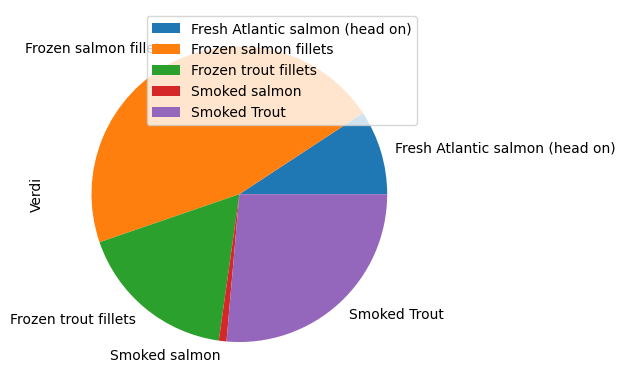

In [39]:
df.set_index("Varebeskrivelse").plot(kind="pie", y="Verdi");

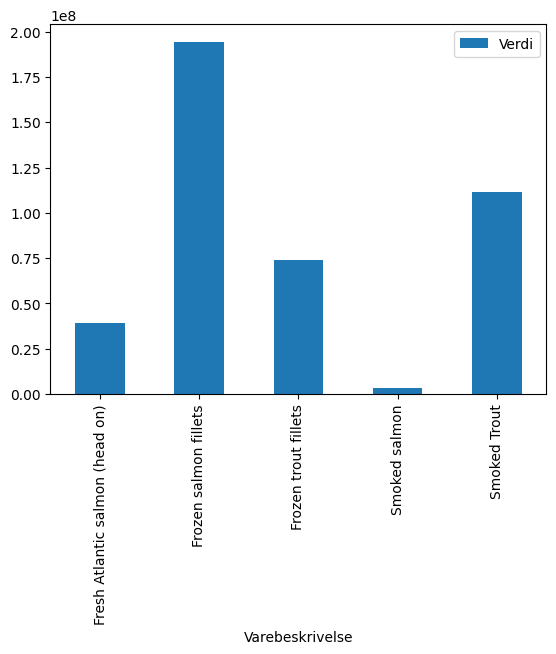

In [37]:
df.set_index("Varebeskrivelse").plot(kind="bar", y="Verdi");

### What was the total export in kg for Smoked salmon in 2020? (Are you able to find it with a single line of code?)

In [66]:
df_ssb[(df_ssb["Varenr"] == 3054100) & (df_ssb["År"] == 2020)].Mengde.sum()

75757

### Calculate the average price (NOK/kg) for Fresh Pacific Salmon in 2019 

In [79]:
df = df_ssb[(df_ssb["Varenr"] == 3044100) & (df_ssb["År"] == 2019)]
(df["Verdi"] / df["Mengde"]).mean()

110.12215162574473

### Bonus: Make a bar chart of the average price for Fresh Pacific Salmon by year

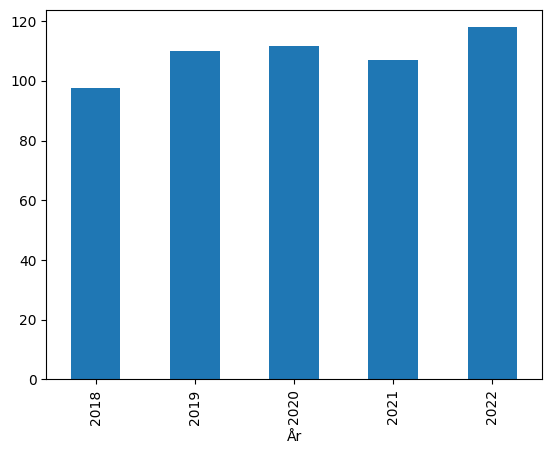

In [87]:
df = df_ssb[df_ssb["Varenr"] == 3044100].copy()
df["price/kg"] = df["Verdi"] / df["Mengde"]
df.groupby("År").mean()["price/kg"].plot(kind="bar");

### CHALLENGING: Assuming that the df_product["Verdi"] is in nok and all exports were traded in local recipient currency,  what was the total export value, in the various local currencies, for Smoked salmon in 2020? 

In [85]:
df = df_ssb[(df_ssb["Varenr"] == 3054100) & (df_ssb["År"] == 2022)]